In [7]:
import pandas as pd
data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')


X_train = data_train.iloc[:, 0:4]
print(X_train)
X_test = data_test.iloc[:, 0:4]

y_train = data_train.select_dtypes(include=['object'])
y_test = data_test.select_dtypes(include=['object'])


y_train

    health  knife  gun  enemies
0        2      0    0        0
1        2      0    0        1
2        2      0    1        1
3        2      0    1        2
4        2      1    0        2
5        2      1    0        1
6        1      0    0        0
7        1      0    0        1
8        1      0    1        1
9        1      0    1        2
10       1      1    0        2
11       1      1    0        1
12       0      0    0        0
13       0      0    0        1
14       0      0    1        1
15       0      0    1        2
16       0      1    0        2
17       0      1    0        1


,Beh
0,dodge
1,dodge
2,attack
3,attack
4,hide
5,attack
6,dodge
7,hide
8,attack
9,hide


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_labels2 = y_train.apply(le.fit_transform)
test_labels2 = y_test.apply(le.fit_transform)

print(train_labels2)
print(test_labels2)

    Beh
0     1
1     1
2     0
3     0
4     2
5     0
6     1
7     2
8     0
9     2
10    2
11    2
12    1
13    2
14    2
15    3
16    3
17    2
   Beh
0    0
1    2
2    1
3    2
4    2
5    2
6    3


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels2)
test_labels = to_categorical(test_labels2)

print(train_labels)
print(test_labels)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


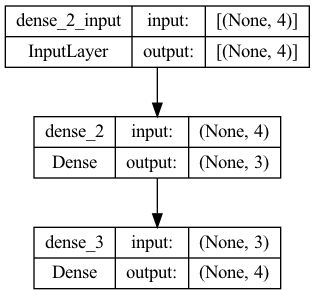

In [10]:
model = models.Sequential()
model.add(layers.Dense(3, activation='relu', input_shape=(4,)))
model.add(layers.Dense(4, activation='softmax'))

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [11]:
from IPython.display import SVG

model.summary()

from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=1000, batch_size=1)

model.get_weights()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3236 - accuracy: 0.3333 - val_loss: 1.2584 - val_accuracy: 0.5714
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.2702 - accuracy: 0.4444 - val_loss: 1.0702 - val_accuracy: 0.5714
Epoch 3/1000
18/18 [==============================] - 0s 999us/step - loss: 1.2445 - accuracy: 0.4444 - val_loss: 1.0894 - val_accuracy: 0.5714
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.1980 - accuracy: 0.4444 - val_loss: 0.9724 - val_accuracy: 0.5714
Epoch 5/1000
18/18 [==============================] - 0s 993us/step - loss: 1.1733 - accuracy: 0.4444 - val_loss: 0.9591 - val_accuracy: 0.5714
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.0865 - accuracy: 0.4444 - val_loss: 0.8609 - val_accuracy: 0.5714
Epoch 7/1000
18/18 [==============================] - 0s 995us/step - loss: 1.0410 - accuracy: 0.4444 - val_loss: 0.8379 - val_accuracy: 0.7143


[array([[-5.4852624 , -0.91066307, -0.5120884 ],
        [-0.67930293, -0.89764184, -0.4937623 ],
        [-1.1310483 , -0.02951354, -0.34545815],
        [ 4.995992  , -0.31240213, -0.6485101 ]], dtype=float32),
 array([-1.5819641,  0.       ,  0.       ], dtype=float32),
 array([[-2.7528927 , -4.641642  ,  2.5398726 ,  5.4838495 ],
        [-0.52277744,  0.7486452 , -0.35808522, -0.8943008 ],
        [-0.513121  , -0.23585933, -0.4090612 ,  0.45985472]],
       dtype=float32),
 array([  4.0135164,   4.0095515,   3.6389308, -11.661965 ], dtype=float32)]

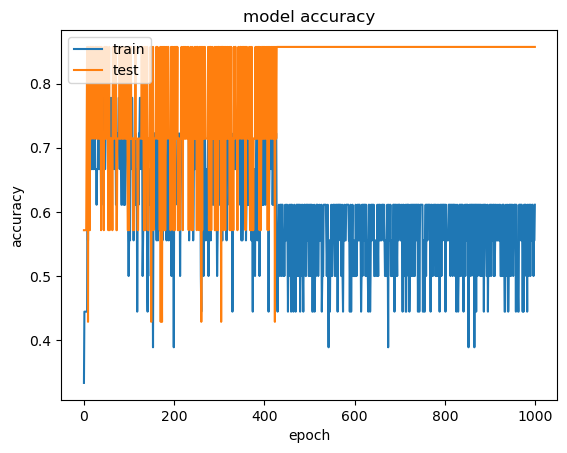

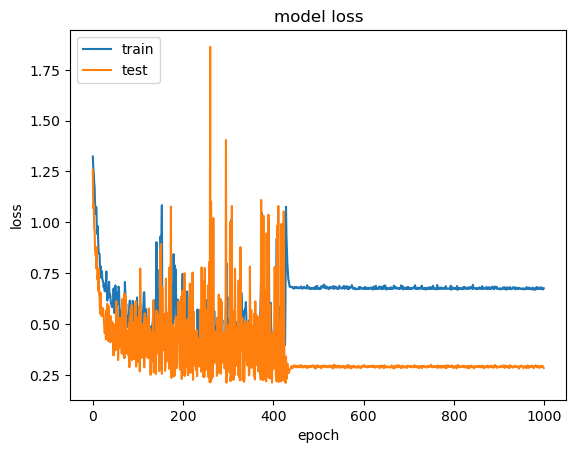

1/1 [==============================] - 0s 20ms/step
[[3.72631371e-01 3.71156842e-01 2.56211698e-01 5.80101762e-08]
 [3.97321396e-03 4.82282601e-04 9.95538414e-01 5.99503574e-06]
 [3.72631371e-01 3.71156842e-01 2.56211698e-01 5.80101762e-08]
 [2.99427629e-04 1.44250225e-05 9.99660730e-01 2.54181432e-05]
 [1.45740423e-03 1.23555132e-04 9.98408616e-01 1.05198169e-05]
 [1.33599417e-04 4.82537644e-06 9.99821842e-01 3.98292977e-05]
 [0.00000000e+00 0.00000000e+00 2.36223957e-10 1.00000000e+00]]
   Beh
0    0
1    2
2    1
3    2
4    2
5    2
6    3


In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ynew = model.predict(X_test)
print(ynew)
print(test_labels2)